<h1>The Data</h1>
This capstone project works with data from Massachusetts Public Schools. The dataset is composed of multiple reports from Massachusetts Department of Education, including enrollment by grade, enrollment by race, teacher salaries, graduation rates and SAT performance.  The data is the latest available as of August 2017.  The data itself is composed of one table and is broken down per school. 

The data can be downloaded from Kaggle here:
https://www.kaggle.com/ndalziel/massachusetts-public-schools-data/data

<h1>Hypotheses</h1>
Given this set of data in regards to students' performance, types of school, diversity and teacher salary.

We expect to see a positive relationship with the following factors:
1. Schools with higher teacher salaries will have more students attending college and will perform better on the SAT.
2. Public schools will be more diverse than charter schools based on the percentage of white students. 

We expect to see a negative relationship between economically disadvantaged students and graduation rates.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics
%matplotlib inline
from scipy.stats import ttest_ind

In [297]:
df = pd.read_csv('MA_Public_Schools.csv')
df.isnull().values.any() 

True

### Do higher teacher salaries equal better performance?

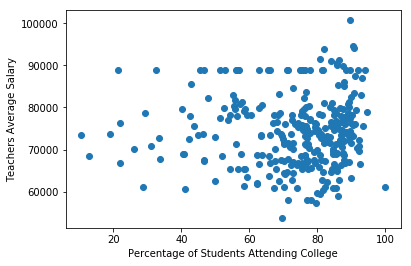

In [237]:
High_school=df[df['12_Enrollment'] > 0]

plt.scatter(x=High_school['% Attending College'], y=High_school['Average Salary'])
plt.xlabel('Percentage of Students Attending College')
plt.ylabel('Teachers Average Salary')
plt.show()



The purpose of this scatter is to visualize any correlations between teacher salaries and students attending college. The y-axis is teacher salary and the x-axis is the percentage of students attending college. The scatter plot is fairly uniform and no strong correlations stand out. 

In [314]:
ave1=np.median(High_school['Average Salary'])
High_school=High_school[High_school['Average Salary'] > 0 ]# To remove the NaN values 
High_school=High_school[High_school['% Attending College'] > 0 ]# To remove the NaN values 
High_school=High_school[High_school['Average SAT_Reading'] > 0 ]# To remove the NaN values 
High_school=High_school[High_school['Average SAT_Writing'] > 0 ]# To remove the NaN values 
High_school=High_school[High_school['Average SAT_Math'] > 0 ]# To remove the NaN values 

above_salary=High_school[High_school['Average Salary'] > ave1 ] 
below_salary=High_school[High_school['Average Salary'] < ave1 ]
                                     
                                    
print(ttest_ind(below_salary['% Attending College'],above_salary['% Attending College'] ,equal_var=False))

Ttest_indResult(statistic=-0.9074061187878382, pvalue=0.3649439203642775)


The T-value is very small. which mean there is not much difference between the means. The p-value is greater than 0.05, indicating the null hypothesis.

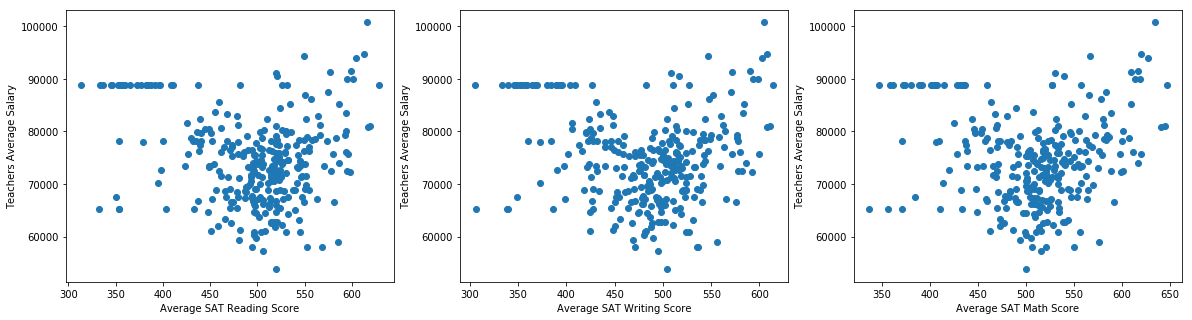

In [295]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.scatter(x=High_school['Average SAT_Reading'], y=High_school['Average Salary'])
plt.xlabel('Average SAT Reading Score')
plt.ylabel('Teachers Average Salary')

plt.subplot(1, 3, 2)
plt.scatter(x=High_school['Average SAT_Writing'], y=High_school['Average Salary'])
plt.xlabel('Average SAT Writing Score')
plt.ylabel('Teachers Average Salary')

plt.subplot(1, 3, 3)
plt.scatter(x=High_school['Average SAT_Math'], y=High_school['Average Salary'])
plt.xlabel('Average SAT Math Score')
plt.ylabel('Teachers Average Salary')

plt.show()

The purpose of this scatters is to visualize any correlations between teacher salaries and students’ SAT scores. The y-axes are teacher salaries. The x-axes are Writing, Reading and Math SAT scores. The scatter plots are fairly uniform and no strong correlations stand out. 
Average teacher salaries are calculated by school district.  The largest district’s data points (Boston) form a line on the charts. 

In [294]:
print(ttest_ind(below_salary['Average SAT_Reading'],above_salary['Average SAT_Reading'] ,equal_var=False))
print(ttest_ind(below_salary['Average SAT_Writing'],above_salary['Average SAT_Writing'] ,equal_var=False))
print(ttest_ind(below_salary['Average SAT_Math'],above_salary['Average SAT_Math'] ,equal_var=False))

Ttest_indResult(statistic=1.4945212030259951, pvalue=0.13649353902864345)
Ttest_indResult(statistic=0.5900683644528307, pvalue=0.5557373961152636)
Ttest_indResult(statistic=0.037579035631216784, pvalue=0.9700575710281047)


All of the T-vaules are small, which indicates there are not many differences between the means. The p-values are greater than 0.05, indicating the null hypothesis.

### Are charter schools more or less diverse?

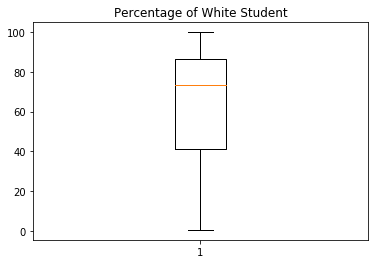

In [317]:
white_students=df['% White']
white_students=white_students[white_students > 0 ]


#print(white_students)
plt.boxplot(white_students)
plt.title('Percentage of White Student')

plt.show()

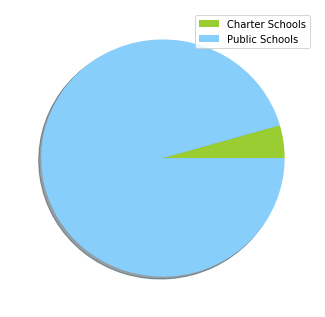

In [197]:
count=0
count2=0
for charter in df['School Type']:
    if charter == 'Charter School':
        count+=1
    else:
         count2 +=1

size=[count, count2]
colors = ['yellowgreen', 'lightskyblue',]
labels = ['Charter Schools', 'Public Schools']

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
patches, texts = plt.pie(size, colors=colors, shadow=True)
plt.legend(patches, labels, loc="best")
plt.show()

This pie chart shows the ratio of public schools to charter schools. There is a small percentage of charter schools 

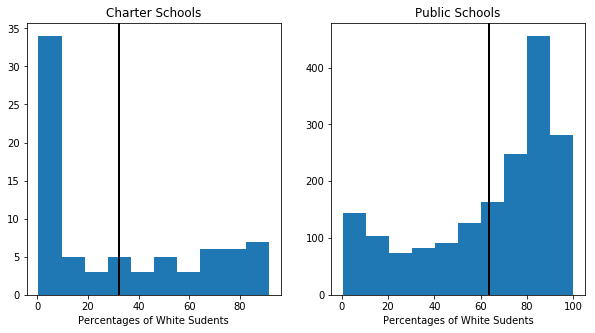

In [319]:
Charter=df[df['School Type'] == 'Charter School']
Charter=Charter[Charter['% White'] > 0] # To remove the NaN values 
Public=df[df['School Type'] == 'Public School']
Public=Public[Public['% White'] > 0] # To remove the NaN values

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(Charter['% White'])
plt.xlabel('Percentages of White Sudents')
plt.axvline(Charter['% White'].mean(), color='black', linestyle='solid', linewidth=2)
plt.title('Charter Schools')

plt.subplot(1, 2, 2)
plt.hist(Public['% White'])
plt.axvline(Public['% White'].mean(), color='black', linestyle='solid', linewidth=2)
plt.xlabel('Percentages of White Sudents')
plt.title('Public Schools')

plt.show()

These two histogram plots show the percentages of white students in charter and public schools. Most of the values for the percentage of white students are very low for charter schools. For public schools it’s the opposite: most of the values are high. These plots strongly indicate that charter schools are more diverse than public schools.  

The Black vertical lines show the mean for percentage of white students in charter and public school.

In [200]:
print(ttest_ind(Public['% White'],Charter['% White'] ,equal_var=False))

Ttest_indResult(statistic=8.482736633169576, pvalue=8.089005701078511e-13)


The t-value is around 8.5, which indicates there is a differencea between the means. The p-value is less than 0.05, so we reject the null hypothesis.

The conclusion: charter schools are more diverse based on the percentage of white students.

### Does economic disadvantage effect graduation rates?

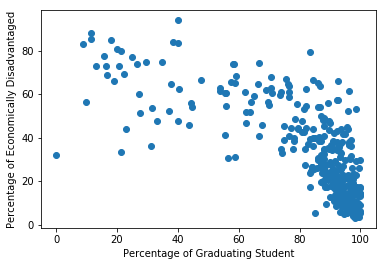

In [234]:
High_school.head()

plt.scatter(x=High_school['% Graduated'], y=High_school['% Economically Disadvantaged'])

plt.xlabel('Percentage of Graduating Student')
plt.ylabel('Percentage of Economically Disadvantaged')
plt.show()

The purpose of this scatter is to visualize any correlations between economically disadvantaged students and schools' graduation rates. The y-axis is the percentage of students, who are economically disadvantaged, and the x-axis is the graduation rate. The scatter plot does show a correlation. It appears that schools with more economically disadvantaged students have lower graduation rates.   


In [316]:
ave=np.median(High_school['% Economically Disadvantaged'])
High_school=High_school[High_school['% Economically Disadvantaged'] > 0 ]
High_school=High_school[High_school['% Graduated'] > 0 ]

above=High_school[High_school['% Economically Disadvantaged'] >ave ] 
below=High_school[High_school['% Economically Disadvantaged'] <ave ]



print(ttest_ind(below['% Graduated'],above['% Graduated'] ,equal_var=False))

Ttest_indResult(statistic=10.147072997808548, pvalue=5.222882845337101e-19)


The t-value confirms the means are different. The p-value is less than 0.05, so it rejects the null hypothesis.

<h1> Conclusion</h1>
So to recap, here are our original hypotheses, followed by our conclusions from the results.

1. Schools with higher teacher salaries will have more students attending college and will perform better on the SAT.
    <p style="color:Red";>Null Result: There was no correlation. Schools with higher teacher salaries did not have more students attending college and did not perform better on the SAT. Null hypothesis accepted. 
2. Public schools will be more diverse than charter schools based on the percentage of white students.
    <p style="color:Green";>POSITIVE RESULT: Public schools are more diverse than charter schools. Null hypothesis rejected.

We expect to see a negative relationship between economically disadvantaged students and graduation rates.
    <p style="color:Green";>POSITIVE RESULT: Schools with more economically disadvantaged students have lower graduation rates. Null hypothesis rejected.
 
    
    
   
    
  

